In [1]:
import lateral_signaling as lsig

import os
from glob import glob
import json

import numpy as np
import pandas as pd

import skimage
import skimage.io as io
import skimage.filters as filt
import skimage.measure as msr

from tqdm import tqdm

import colorcet as cc

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import holoviews as hv
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
%load_ext blackcellmagic
%matplotlib inline

<hr>

## Image I/O and pre-processing

In [3]:
# Options for saving
save_data = False
save_figs = False
fmt       = "png"
dpi       = 300

data_dir  = os.path.abspath("../data/imaging/partial_wave")
save_dir  = os.path.abspath("../plots")

In [4]:
# Set paths to data
image_dir          = os.path.join(data_dir, "processed")
circle_data_path   = os.path.join(data_dir, "partialwave_roi_circle_data.csv")
circle_params_path = os.path.join(data_dir, "partialwave_roi_circle_params.json")
im_layout_path     = os.path.join(save_dir, "partialwave_images_layout." + fmt)
lp_params_path     = os.path.join(data_dir, "partialwave_line_profile.json")
lp_data_path       = os.path.join(data_dir, "partialwave_line_profile_data.json")

In [5]:
# Get image filenames
files = glob(os.path.join(image_dir, "*.tif*"))
files = [os.path.realpath(f) for f in files]
n_ims = len(files)

In [6]:
# Select blue and green fluorescence images (BFP and GFP)
files_B = [f for f in files if "BFP" in f]
files_G = [f for f in files if "GFP" in f]

In [81]:
# Get unique name for each image
im_names = []
for f in (*files_B, *files_G):
    end = os.path.split(f)[1]
    im_names.append(end[:end.index(".")])
    
# Get time points as days/hours
t_hours = [float(imn[-6:-3]) for imn in im_names]
t_days  = [h / 24 for h in t_hours]

In [8]:
# Load images and convert to image collections
load_B = lambda f: io.imread(f).astype(np.uint8)[:, :, 2]
load_G = lambda f: io.imread(f).astype(np.uint8)[:, :, 1]
ims_B = io.ImageCollection(files_B, load_func=load_B)
ims_G = io.ImageCollection(files_G, load_func=load_G)

In [9]:
# Get images as Numpy array
ims = list(ims_B) + list(ims_G)

# Save shape of each image
imshapes = (ims_B[0].shape, ims_G[0].shape)

In [10]:
fig = plt.figure(figsize=(18, 6))
rows, cols = 2, 5
for i in range(rows * cols):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(ims[i])
    plt.title(im_names[i])

plt.tight_layout()

---

### Load circular ROIs

In [11]:
circle_verts_df = pd.read_csv(circle_data_path)
circle_verts_df

im_name     x_center     y_center       radius
0  partialwave_BFP_064hrs  1790.241253  1777.776782  1604.962517
1  partialwave_BFP_088hrs  1787.698337  1765.160030  1549.765231
2  partialwave_BFP_112hrs  1778.297460  1799.371279  1599.695390
3  partialwave_BFP_136hrs  1742.763997  1750.020462  1593.463222
4  partialwave_BFP_160hrs  1707.211903  1706.811550  1591.018509
5  partialwave_GFP_064hrs  1796.037502  1762.449442  1602.627697
6  partialwave_GFP_088hrs  1785.079957  1740.020279  1601.802609
7  partialwave_GFP_112hrs  1786.912795  1749.088851  1597.062356
8  partialwave_GFP_136hrs  1754.544660  1744.785853  1595.768520
9  partialwave_GFP_160hrs  1706.205673  1659.108954  1597.712541

In [12]:
circle_verts = circle_verts_df.iloc[:, 1:].values

In [14]:
with open(circle_params_path, "r") as f: 
    circle_params = json.load(f)
    
    # Diameter of the well
    well_diameter_mm = circle_params["well_diameter_mm"]

---

## Load parameters for line profile

In [45]:
with open(lp_params_path, "r") as f: 
    
    lp_data = json.load(f)
    
    src = np.array([lp_data["x_src"], lp_data["y_src"]])
    dst = np.array([lp_data["x_dst"], lp_data["y_dst"]])
    lp_width = int(lp_data["width"])
    
    im_for_lp = int(lp_data["im_for_lp"])

In [46]:
# Calculate corners given the endpoints and width
lp_corners = lsig.get_lp_corners(src, dst, lp_width)

# Get center and radius of the reference well used to draw the line profile
center = np.array([circle_verts[im_for_lp, :2]])
radius = circle_verts[im_for_lp, 2]

# Calculate length of line profile in mm
lp_length_mm = np.linalg.norm(src - dst) / (2 * radius) * well_diameter_mm

In [47]:
print("Beginning of line profile:", src)
print("End of line profile      :", dst)
print("Width of line profile    :", lp_width)
print("Endpoints:")
print(lp_corners)

Beginning of line profile: [1500.  400.]
End of line profile      : [1800. 2900.]
Width of line profile    : 1000
Endpoints:
[[1003.56158076  459.57261031]
 [1996.43841924  340.42738969]
 [2296.43841924 2840.42738969]
 [1303.56158076 2959.57261031]]


<hr>

# Plot layouts of images

Saving to: /home/pbhamidi/git/evomorph/plots/partialwave_images_layout.png


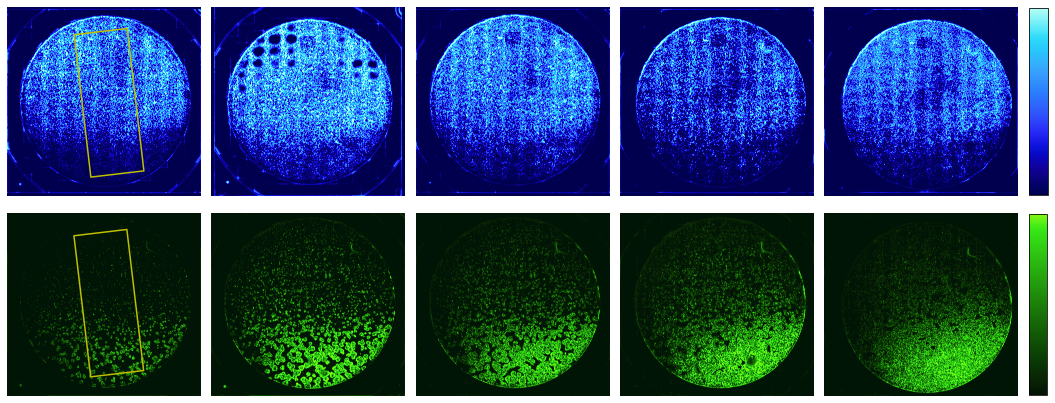

In [102]:
rows, cols = 2, 5

cbar_aspect = 10
gs_kw = dict(width_ratios = [1 if i < cols - 1 else 1.25 for i in range(cols) ])

fig, axs = plt.subplots(rows, cols, figsize=(15, 6), gridspec_kw=gs_kw)

for i, ax in enumerate(axs.flat):
    
    cmap_ = (cc.cm["kbc"], lsig.kgy)[i // cols]
    
    *_c, _r = circle_verts[i]
    _src  = lsig.transform_point(src, center, radius, _c, _r)
    _dst  = lsig.transform_point(dst, center, radius, _c, _r)
    _lp_width = lp_width * _r / radius
    _lp_corners = lsig.get_lp_corners(_src, _dst, _lp_width)
    
    ax.imshow(
        ims[i],
        cmap=cmap_,
    )
    
#     ax.set_title(f"{i}: " + ("BFP", "GFP")[i // cols] + "#" + str((1, 2, 3, 4, 5)[i % cols]))
    
    ax.axis("off")
    
    if i % cols == 0:
    
        # Plot line profile as a rectangle
        pc = PatchCollection([Polygon(_lp_corners)])
        pc.set(edgecolor="y", linewidth=1.5, facecolor=(0, 0, 0, 0), )

        ax.add_collection(pc)

    if i % cols == cols - 1:
        _shrink = (0.9, 0.87)[i // cols]
        plt.colorbar(cm.ScalarMappable(cmap=cmap_), ax=ax, shrink=_shrink, ticks=[], aspect=cbar_aspect)
    
    
    ax.invert_yaxis()
    ax.invert_xaxis()


plt.tight_layout()

if save_figs:
    print("Saving to:", im_layout_path)
    plt.savefig(im_layout_path, format=fmt, dpi=dpi)

<hr>

In [66]:
# Select an image for HoloViews. Needs to be reversed
#   in the y-axis to preserve orientation with Matplotlib.
_im = ims[im_for_lp].copy()
_im = filt.gaussian(_im, sigma=filt_sigma)
_im = lsig.rescale_img(_im)

im_hv = _im[::-1].copy()

:Overlay
   .Image.I    :Image   [x,y]   (z)
   .Curve.I    :Curve   [x]   (y)
   .Polygons.I :Polygons   [x,y]
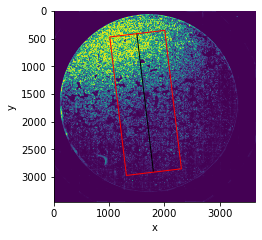

In [67]:
im_lp = hv.Image(
    im_hv, 
    bounds=(0, 0, im_hv.shape[1], im_hv.shape[0]),
).opts(
    invert_yaxis=True,
    cmap="viridis",
    aspect="equal",
) * hv.Curve(
    (
        (src[0], dst[0]), 
        (src[1], dst[1]), 
    )
).opts(
    c="k",
    linewidth=1,
) * hv.Polygons(
    (lp_corners[:, 0], lp_corners[:, 1])
).opts(
    edgecolor="r",
    facecolor=(0,0,0,0),
    linewidth=1,
)

im_lp

In [86]:
line_profiles = []

for i, im in enumerate(tqdm(ims)):
    
    _im = im.copy()
    _im = lsig.rescale_img(_im)
    
    *_c, _r = circle_verts[i]
    _src  = lsig.transform_point(src, center, radius, _c, _r)
    _dst  = lsig.transform_point(dst, center, radius, _c, _r)
    _lp_width = int(lp_width * _r / radius)
    
    prof = msr.profile_line(
        image=_im.T, 
        src=_src, 
        dst=_dst, 
        linewidth=_lp_width,
        mode="constant", 
        cval=-200, 
    )
    
    line_profiles.append(prof)

100%|███████████████████████████████████████| 10/10 [00:04<00:00,  2.25it/s]


In [87]:
lp_curves = [
    hv.Curve(lp).opts(padding=0.05)
    for lp in line_profiles
]

:Layout
   .Curve.I    :Curve   [x]   (y)
   .Curve.II   :Curve   [x]   (y)
   .Curve.III  :Curve   [x]   (y)
   .Curve.IV   :Curve   [x]   (y)
   .Curve.V    :Curve   [x]   (y)
   .Curve.VI   :Curve   [x]   (y)
   .Curve.VII  :Curve   [x]   (y)
   .Curve.VIII :Curve   [x]   (y)
   .Curve.IX   :Curve   [x]   (y)
   .Curve.X    :Curve   [x]   (y)
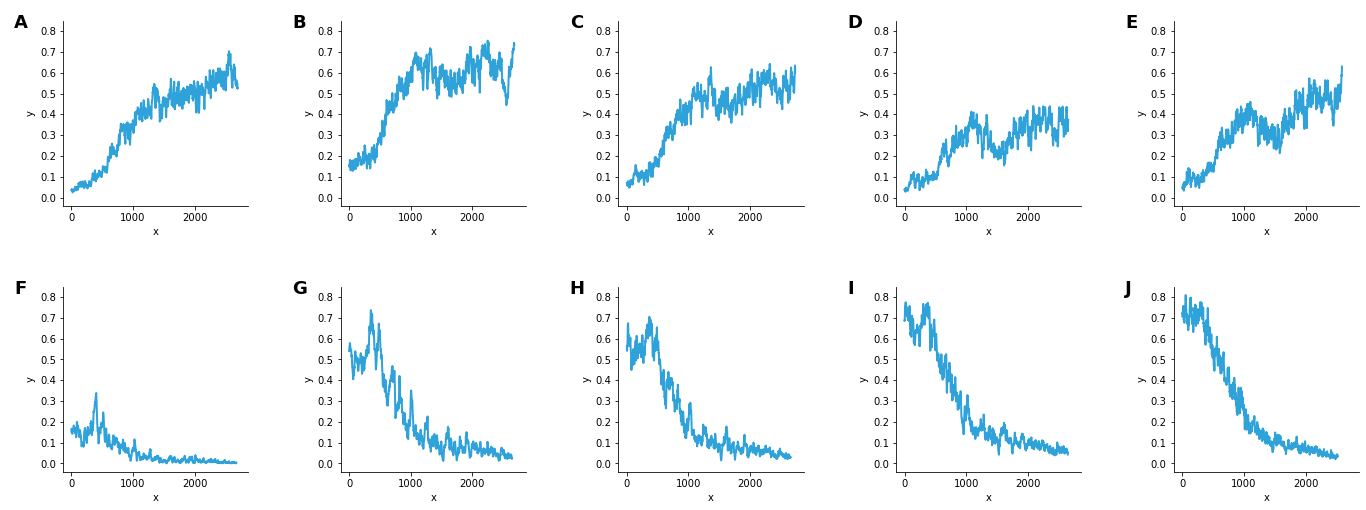

In [88]:
hv.Layout(lp_curves).cols(5)

__Convert to dictionary__

In [89]:
lp_data_dict = {
    "lp_length": lp_length_mm, 
    "im_names": im_names,
    "t_hours": list(t_hours),
}

for imn, lp in zip(im_names, line_profiles):
    lp_data_dict[imn] = list(lp)

__Save as JSON__

In [90]:
if save_data:
    with open(lp_data_path, "w") as f:
        json.dump(lp_data_dict, f, indent=4)

<hr>